### Project Topic: Customer Segmentation Using K-Means on Purchase Data	
#### Objective: Group customers into segments based on their purchase behavior.	
#### Process:	
- EDA
- Step 1:	Use a dataset with customer transactions and aggregate features like total spend, frequency, and recency.
- Step 2:	Normalize the data and apply the K-Means algorithm to create customer segments.
- Step 3:	Analyze the characteristics of each segment (e.g., high-value customers, infrequent buyers).
#### Evaluation:	
- Use silhouette scores to assess clustering performance.
- Visualize segments using scatter plots or bar charts.
- Compare segments with business-defined categories (if available).

#### About the dataset:

The file scanner_data.csv contains he data provide detailed information about quantities, characteristics and values of goods sold as well as their prices.

The data is organized into 8 columns, each representing key attributes of retail store transactions. This dataset can be used contains enough information to perform RFM then segment customers.


In [0]:
path ="/FileStore/tables/scanner_data.csv"
df = spark.read.csv(path, header=True, inferSchema=True)
df.show(5)



+---+----------+-----------+--------------+------------+-----+--------+------------+
|_c0|      Date|Customer_ID|Transaction_ID|SKU_Category|  SKU|Quantity|Sales_Amount|
+---+----------+-----------+--------------+------------+-----+--------+------------+
|  1|2016-01-02|       2547|             1|         X52|0EM7L|     1.0|        3.13|
|  2|2016-01-02|        822|             2|         2ML|68BRQ|     1.0|        5.46|
|  3|2016-01-02|       3686|             3|         0H2|CZUZX|     1.0|        6.35|
|  4|2016-01-02|       3719|             4|         0H2|549KK|     1.0|        5.59|
|  5|2016-01-02|       9200|             5|         0H2|K8EHH|     1.0|        6.88|
+---+----------+-----------+--------------+------------+-----+--------+------------+
only showing top 5 rows



In [0]:
display(df)

_c0 Date Customer_ID Transaction_ID SKU_Category SKU Quantity Sales_Amount 1 2016-01-02 2547 1 X52 0EM7L 1.0 3.13 2 2016-01-02 822 2 2ML 68BRQ 1.0 5.46 3 2016-01-02 3686 3 0H2 CZUZX 1.0 6.35 4 2016-01-02 3719 4 0H2 549KK 1.0 5.59 5 2016-01-02 9200 5 0H2 K8EHH 1.0 6.88 6 2016-01-02 5010 6 JPI GVBRC 1.0 10.77 7 2016-01-02 1666 7 XG4 AHAE7 1.0 3.65 8 2016-01-02 1666 7 FEW AHZNS 1.0 8.21 9 2016-01-02 1253 8 0H2 9STQJ 1.0 8.25 10 2016-01-02 5541 9 N5F 7IE9S 1.0 8.18 11 2016-01-02 5541 9 H8O M15RG 1.0 6.35 12 2016-01-02 7548 10 N8U UNJKW 1.0 2.11 13 2016-01-02 7548 10 JR5 KWDJZ 1.0 5.38 14 2016-01-02 6865 11 I4Y 8ETY5 1.0 8.04 15 2016-01-02 6044 12 N8U EMJ1S 1.0 3.62 16 2016-01-02 6044 12 X52 CRK31 1.0 3.96 17 2016-01-02 592 13 YMJ YJTMP 1.0 11.65 18 2016-01-02 592 13 P42 B2IW9 1.0 9.0 19 2016-01-02 6450 14 N8U 4A2M0 1.0 7.02 20 2016-01-02 3874 15 FEW F79YP 1.0 16.91 21 2016-01-02 3874 15 SFC 26XOE 2.0 4.75 22 2016-01-02 5599 16 7C6 0ZEQ8 1.0 7.85 23 2016-01-02 5599 16 OQA DWJC4 1.0 12.87 24 2016-01-02 9223 17 TW8 E63V3 1.0 1.62 25 2016-01-02 9223 17 Q4N EGB8E 1.0 10.5 26 2016-01-02 4921 18 H15 NEYQ4 1.0 3.75 27 2016-01-02 6294 19 N5F 4PLF3 1.0 2.91 28 2016-01-02 6294 19 F9B W9RKF 1.0 7.9 29 2016-01-02 6294 19 C8Z 520UE 1.0 9.06 30 2016-01-02 5780 20 BR0 NIXNF 1.0 22.25 31 2016-01-02 2116 21 X52 T5V5W 1.0 7.02 32 2016-01-02 2116 21 2ML 3483Q 1.0 7.29 33 2016-01-02 3624 22 P42 W22UD 1.0 5.87 34 2016-01-02 1253 23 R6E YIM6C 1.0 8.65 35 2016-01-02 1253 23 LIB 8D73U 1.0 13.1 36 2016-01-02 1253 23 N8U EMJ1S 1.0 3.62 37 2016-01-02 1253 23 R6E F90L2 1.0 2.31 38 2016-01-02 5058 24 OXH DPAB1 1.0 23.61 39 2016-01-02 4736 25 X52 T5V5W 1.0 7.02 40 2016-01-02 4736 25 29A RBNO8 1.0 10.02 41 2016-01-02 4736 25 P42 RVZ6I 1.0 6.69 42 2016-01-02 3071 26 FZT GJUAD 1.0 4.91 43 2016-01-02 3071 26 N8U UNJKW 2.0 4.23 44 2016-01-02 2065 27 T80 LP9DJ 1.0 6.63 45 2016-01-02 8566 28 SFC XHB4M 1.0 2.13 46 2016-01-02 8303 29 FEW QWSWG 1.0 5.12 47 2016-01-02 4776 30 YMJ 3CUG7 1.0 5.38 48 2016-01-02 6459 31 EPM DFPBD 1.0 1.5 49 2016-01-02 6459 31 JKC 0TLU5 2.0 2.13 50 2016-01-02 2546 32 O38 O1RNE 1.0 3.63 51 2016-01-02 1595 33 Z4O 82JKU 1.0 2.0 52 2016-01-02 4022 34 0H2 CZUZX 1.0 6.35 53 2016-01-02 4022 34 0H2 LQ555 1.0 7.57 54 2016-01-02 2438 35 P42 5Y2V7 1.0 4.57 55 2016-01-02 2438 35 R6E F64H7 1.0 2.86 56 2016-01-02 6179 36 QV7 FZM7U 1.0 8.62 57 2016-01-02 6179 36 JPI D80TK 1.0 1.98 58 2016-01-02 4316 37 XG4 IQNBU 1.0 6.35 59 2016-01-02 4316 37 N8U COWU2 1.0 4.43 60 2016-01-02 3391 38 QCG E7DJL 1.0 5.32 61 2016-01-02 1655 39 OBD RZW8B 1.0 26.57 62 2016-01-02 1655 39 JI5 4TTS2 1.0 6.9 63 2016-01-02 1655 39 N5F AEKO3 1.0 18.63 64 2016-01-02 3883 40 H15 CERTN 1.0 6.4 65 2016-01-02 3883 40 N8U ZDSYK 1.0 1.71 66 2016-01-02 3883 40 R6E F64H7 1.0 2.86 67 2016-01-02 3883 41 N8U I36F2 1.0 4.23 68 2016-01-02 6797 42 R6E F90L2 1.0 2.31 69 2016-01-02 8521 43 P42 OV1P9 1.0 5.73 70 2016-01-02 2476 44 H15 4D1NN 1.0 6.62 71 2016-01-02 824 45 Z4O GID11 1.0 30.0 72 2016-01-02 3785 46 FU5 6DCYD 1.0 7.32 73 2016-01-02 3785 46 8HU 20XCP 1.0 15.83 74 2016-01-02 1098 47 FEW JJ9FT 1.0 5.79 75 2016-01-02 1098 47 EMC 23Y9E 3.0 15.18 76 2016-01-02 1098 47 FEW 25CJ5 1.0 10.3 77 2016-01-02 6112 48 0WT AK33R 1.0 12.4 78 2016-01-02 6112 48 R6E F64H7 1.0 2.86 79 2016-01-02 6112 48 29A RH5J5 1.0 4.23 80 2016-01-02 8515 49 C8Z 5FESW 1.0 14.43 81 2016-01-02 708 50 0H2 K8EHH 1.0 6.88 82 2016-01-02 5097 51 BZU 68AG2 1.0 7.23 83 2016-01-02 8473 52 N8U COWU2 1.0 4.43 84 2016-01-02 9011 53 1TS MNJUQ 1.0 16.12 85 2016-01-02 4720 54 P42 OV1P9 1.0 5.73 86 2016-01-02 4720 54 0H2 MQPSJ 1.0 4.19 87 2016-01-02 4414 55 2ML 7YTSF 1.0 5.66 88 2016-01-02 4414 55 JPI 9XQSN 1.0 2.11 89 2016-01-02 4414 55 FEW SANGZ 1.0 9.38 90 2016-01-02 4414 55 3WV BKQSZ 1.0 4.94 91 2016-01-02 2125 56 P42 IPVE6 1.0 4.5 92 2016-01-02 2562 57 0H2 549KK 1.0 5.59 93 2016-01-02 2562 57 QCG A6Z4C 1.0 5.37 94 2016-01-02 473 58 J4R AODV3 2.0 8.73 95 2016-01-02 473 58 A38 MZL43 3.0 8.14 96 2016-01-02 9113 59 N8U 0AEJH 1.0 1.89 97 2016-01

#### A. Data Preparation


In [0]:
#Schema checking
df.printSchema()

# Checking Values
print(f"Number of counts: {df.count()}")
print(f"Number of columns: {len(df.columns)}")


root
 |-- _c0: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- Customer_ID: integer (nullable = true)
 |-- Transaction_ID: integer (nullable = true)
 |-- SKU_Category: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Sales_Amount: double (nullable = true)

Number of counts: 131706
Number of columns: 8


In [0]:
#check for missing data
from pyspark.sql.functions import col, sum
df.select([sum(col(c).isNull().cast("int")).alias(c) for c in df.columns]).show()

+---+----+-----------+--------------+------------+---+--------+------------+
|_c0|Date|Customer_ID|Transaction_ID|SKU_Category|SKU|Quantity|Sales_Amount|
+---+----+-----------+--------------+------------+---+--------+------------+
|  0|   0|          0|             0|           0|  0|       0|           0|
+---+----+-----------+--------------+------------+---+--------+------------+



In [0]:
# check for duplicate
duplicate_count = df.count() - df.dropDuplicates().count()
print(f"Numbers of duplicate value: {duplicate_count}")

Numbers of duplicate value: 0


In [0]:
#dropping unessecary variable
df = df.drop("_c0")
df.show(5)

+----------+-----------+--------------+------------+-----+--------+------------+
|      Date|Customer_ID|Transaction_ID|SKU_Category|  SKU|Quantity|Sales_Amount|
+----------+-----------+--------------+------------+-----+--------+------------+
|2016-01-02|       2547|             1|         X52|0EM7L|     1.0|        3.13|
|2016-01-02|        822|             2|         2ML|68BRQ|     1.0|        5.46|
|2016-01-02|       3686|             3|         0H2|CZUZX|     1.0|        6.35|
|2016-01-02|       3719|             4|         0H2|549KK|     1.0|        5.59|
|2016-01-02|       9200|             5|         0H2|K8EHH|     1.0|        6.88|
+----------+-----------+--------------+------------+-----+--------+------------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import col

# Chuyển đổi Customer_ID và Transaction_ID sang dạng string
df = df.withColumn("Customer_ID", col("Customer_ID").cast("string"))
df = df.withColumn("Transaction_ID", col("Transaction_ID").cast("string"))

# Kiểm tra schema sau khi chuyển đổi
df.printSchema()


root
 |-- Date: date (nullable = true)
 |-- Customer_ID: string (nullable = true)
 |-- Transaction_ID: string (nullable = true)
 |-- SKU_Category: string (nullable = true)
 |-- SKU: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Sales_Amount: double (nullable = true)



In [0]:
from pyspark.sql.functions import to_date
from pyspark.sql.functions import col, count, max, datediff, current_date, sum as spark_sum


df = df.withColumn("Date", to_date(col("Date"), "yyyy-MM-dd"))

#### B. Exploratory Data Analysis (EDA)


In [0]:
numeric_cols = ['Quantity', 'Sales_Amount']
# Descriptive statistics
df.describe(numeric_cols).show()


+-------+------------------+------------------+
|summary|          Quantity|      Sales_Amount|
+-------+------------------+------------------+
|  count|            131706|            131706|
|   mean|1.4853114436699932|11.981524152278366|
| stddev|3.8726674357653827|19.359699494203028|
|    min|              0.01|              0.02|
|    max|             400.0|            707.73|
+-------+------------------+------------------+



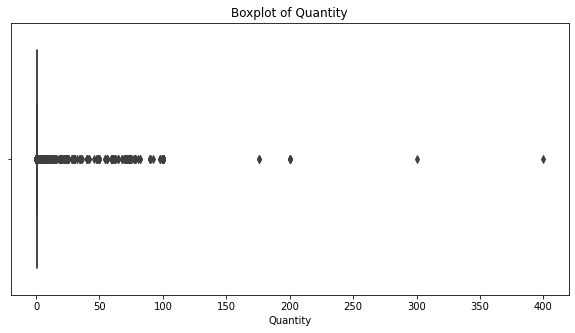

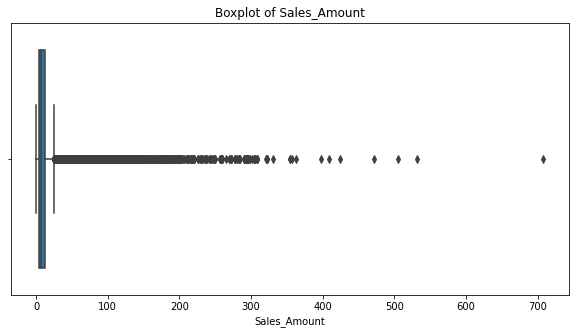

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chuyển đổi dữ liệu sang Pandas để vẽ Boxplot
pandas_df = df.select(numeric_cols).toPandas()

# Vẽ Boxplot để kiểm tra outliers
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=pandas_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [0]:

from pyspark.sql.functions import col

# Lọc dữ liệu theo ngưỡng cố định
df = df.filter((col("Quantity") <= 50) & (col("Sales_Amount") <= 100))

# Hiển thị dữ liệu đã lọc
df.show(5)



+----------+-----------+--------------+------------+-----+--------+------------+
|      Date|Customer_ID|Transaction_ID|SKU_Category|  SKU|Quantity|Sales_Amount|
+----------+-----------+--------------+------------+-----+--------+------------+
|2016-01-02|       2547|             1|         X52|0EM7L|     1.0|        3.13|
|2016-01-02|        822|             2|         2ML|68BRQ|     1.0|        5.46|
|2016-01-02|       3686|             3|         0H2|CZUZX|     1.0|        6.35|
|2016-01-02|       3719|             4|         0H2|549KK|     1.0|        5.59|
|2016-01-02|       9200|             5|         0H2|K8EHH|     1.0|        6.88|
+----------+-----------+--------------+------------+-----+--------+------------+
only showing top 5 rows



In [0]:
print(f"Number of counts: {df.count()}")

Number of counts: 130367


#####Creating RFM Variables
The RFM method is a manual but very effective approach to classifying customers according to their purchasing behavior. 

- Recency (R): Time since last purchase by days.
Calculated by: current_date - max_purchase_date
- Frequency (F): Number of customer transactions in a given period of time. 
Calculated by: count Purchase_date of each customerID
- Monetary (M): Total amount of money customers spent during that period. 
Calculated by: sum Final_price of each customerID


In [0]:
from pyspark.sql.functions import col, datediff, lit

# Import hàm max từ Spark với tên khác để tránh xung đột
from pyspark.sql.functions import max as spark_max

# 1. Tìm ngày cuối cùng trong dataset
max_date = df.select(spark_max("Date")).collect()[0][0]

# 2. Nhóm dữ liệu theo Customer_ID và lấy ngày mua hàng cuối cùng
last_purchase = df.groupBy("Customer_ID").agg(spark_max("Date").alias("Last_Purchase_Date"))

# 3. Tính Recency (khoảng cách giữa ngày cuối cùng và ngày mua hàng cuối cùng)
last_purchase = last_purchase.withColumn("Recency", datediff(lit(max_date), col("Last_Purchase_Date")))

# Join Recency vào DataFrame chính
df = df.join(last_purchase.select("Customer_ID", "Recency"), on="Customer_ID", how="left")

# Hiển thị kết quả
df.show(5)



+-----------+----------+--------------+------------+-----+--------+------------+-------+
|Customer_ID|      Date|Transaction_ID|SKU_Category|  SKU|Quantity|Sales_Amount|Recency|
+-----------+----------+--------------+------------+-----+--------+------------+-------+
|       2547|2016-01-02|             1|         X52|0EM7L|     1.0|        3.13|    259|
|        822|2016-01-02|             2|         2ML|68BRQ|     1.0|        5.46|    332|
|       3686|2016-01-02|             3|         0H2|CZUZX|     1.0|        6.35|    298|
|       3719|2016-01-02|             4|         0H2|549KK|     1.0|        5.59|    301|
|       9200|2016-01-02|             5|         0H2|K8EHH|     1.0|        6.88|    266|
+-----------+----------+--------------+------------+-----+--------+------------+-------+
only showing top 5 rows



In [0]:
from pyspark.sql.functions import countDistinct

frequency = df.groupBy("Customer_ID").agg(countDistinct("Date").alias("Frequency"))

# Join với DataFrame ban đầu
df = df.join(frequency, on="Customer_ID", how="left")


In [0]:
#Create new columns
from pyspark.sql.functions import sum as spark_sum

monetary = df.groupBy("Customer_ID").agg(
    spark_sum("Sales_Amount").alias("Monetary")
)

# Join the df
df = df.join(monetary, on="Customer_ID", how="left")


df.show(5)

+-----------+----------+--------------+------------+-----+--------+------------+-------+---------+------------------+
|Customer_ID|      Date|Transaction_ID|SKU_Category|  SKU|Quantity|Sales_Amount|Recency|Frequency|          Monetary|
+-----------+----------+--------------+------------+-----+--------+------------+-------+---------+------------------+
|       2547|2016-01-02|             1|         X52|0EM7L|     1.0|        3.13|    259|        7|121.36000000000001|
|        822|2016-01-02|             2|         2ML|68BRQ|     1.0|        5.46|    332|        3|              20.4|
|       3686|2016-01-02|             3|         0H2|CZUZX|     1.0|        6.35|    298|       15| 405.4400000000001|
|       3719|2016-01-02|             4|         0H2|549KK|     1.0|        5.59|    301|       10|420.71999999999997|
|       9200|2016-01-02|             5|         0H2|K8EHH|     1.0|        6.88|    266|        2|             18.01|
+-----------+----------+--------------+------------+----

In [0]:
display(df)

Customer_ID Date Transaction_ID SKU_Category SKU Quantity Sales_Amount Recency Frequency Monetary 2547 2016-01-02 1 X52 0EM7L 1.0 3.13 259 7 121.36000000000001 822 2016-01-02 2 2ML 68BRQ 1.0 5.46 332 3 20.4 3686 2016-01-02 3 0H2 CZUZX 1.0 6.35 298 15 405.4400000000001 3719 2016-01-02 4 0H2 549KK 1.0 5.59 301 10 420.71999999999997 9200 2016-01-02 5 0H2 K8EHH 1.0 6.88 266 2 18.01 5010 2016-01-02 6 JPI GVBRC 1.0 10.77 364 1 10.77 1666 2016-01-02 7 XG4 AHAE7 1.0 3.65 0 52 679.19 1666 2016-01-02 7 FEW AHZNS 1.0 8.21 0 52 679.19 1253 2016-01-02 8 0H2 9STQJ 1.0 8.25 320 5 161.51000000000008 5541 2016-01-02 9 N5F 7IE9S 1.0 8.18 282 11 392.53000000000003 5541 2016-01-02 9 H8O M15RG 1.0 6.35 282 11 392.53000000000003 7548 2016-01-02 10 N8U UNJKW 1.0 2.11 348 2 29.03 7548 2016-01-02 10 JR5 KWDJZ 1.0 5.38 348 2 29.03 6865 2016-01-02 11 I4Y 8ETY5 1.0 8.04 277 4 30.159999999999997 6044 2016-01-02 12 N8U EMJ1S 1.0 3.62 209 10 183.88000000000002 6044 2016-01-02 12 X52 CRK31 1.0 3.96 209 10 183.88000000000002 592 2016-01-02 13 YMJ YJTMP 1.0 11.65 242 4 56.73 592 2016-01-02 13 P42 B2IW9 1.0 9.0 242 4 56.73 6450 2016-01-02 14 N8U 4A2M0 1.0 7.02 242 2 8.79 3874 2016-01-02 15 FEW F79YP 1.0 16.91 218 6 102.82 3874 2016-01-02 15 SFC 26XOE 2.0 4.75 218 6 102.82 5599 2016-01-02 16 7C6 0ZEQ8 1.0 7.85 299 5 113.58 5599 2016-01-02 16 OQA DWJC4 1.0 12.87 299 5 113.58 9223 2016-01-02 17 TW8 E63V3 1.0 1.62 364 1 12.120000000000001 9223 2016-01-02 17 Q4N EGB8E 1.0 10.5 364 1 12.120000000000001 4921 2016-01-02 18 H15 NEYQ4 1.0 3.75 364 1 3.75 6294 2016-01-02 19 N5F 4PLF3 1.0 2.91 252 5 97.68 6294 2016-01-02 19 F9B W9RKF 1.0 7.9 252 5 97.68 6294 2016-01-02 19 C8Z 520UE 1.0 9.06 252 5 97.68 5780 2016-01-02 20 BR0 NIXNF 1.0 22.25 261 2 26.82 2116 2016-01-02 21 X52 T5V5W 1.0 7.02 364 1 14.309999999999999 2116 2016-01-02 21 2ML 3483Q 1.0 7.29 364 1 14.309999999999999 3624 2016-01-02 22 P42 W22UD 1.0 5.87 303 2 32.949999999999996 1253 2016-01-02 23 R6E YIM6C 1.0 8.65 320 5 161.51000000000008 1253 2016-01-02 23 LIB 8D73U 1.0 13.1 320 5 161.51000000000008 1253 2016-01-02 23 N8U EMJ1S 1.0 3.62 320 5 161.51000000000008 1253 2016-01-02 23 R6E F90L2 1.0 2.31 320 5 161.51000000000008 5058 2016-01-02 24 OXH DPAB1 1.0 23.61 337 3 50.36 4736 2016-01-02 25 X52 T5V5W 1.0 7.02 264 4 52.18000000000001 4736 2016-01-02 25 29A RBNO8 1.0 10.02 264 4 52.18000000000001 4736 2016-01-02 25 P42 RVZ6I 1.0 6.69 264 4 52.18000000000001 3071 2016-01-02 26 FZT GJUAD 1.0 4.91 303 2 16.16 3071 2016-01-02 26 N8U UNJKW 2.0 4.23 303 2 16.16 2065 2016-01-02 27 T80 LP9DJ 1.0 6.63 283 3 38.73 8566 2016-01-02 28 SFC XHB4M 1.0 2.13 167 6 139.38 8303 2016-01-02 29 FEW QWSWG 1.0 5.12 291 4 30.42 4776 2016-01-02 30 YMJ 3CUG7 1.0 5.38 364 1 5.38 6459 2016-01-02 31 EPM DFPBD 1.0 1.5 280 2 20.060000000000002 6459 2016-01-02 31 JKC 0TLU5 2.0 2.13 280 2 20.060000000000002 2546 2016-01-02 32 O38 O1RNE 1.0 3.63 290 3 13.5 1595 2016-01-02 33 Z4O 82JKU 1.0 2.0 342 2 16.869999999999997 4022 2016-01-02 34 0H2 CZUZX 1.0 6.35 330 4 134.49 4022 2016-01-02 34 0H2 LQ555 1.0 7.57 330 4 134.49 2438 2016-01-02 35 P42 5Y2V7 1.0 4.57 364 1 7.43 2438 2016-01-02 35 R6E F64H7 1.0 2.86 364 1 7.43 6179 2016-01-02 36 QV7 FZM7U 1.0 8.62 232 12 215.79999999999998 6179 2016-01-02 36 JPI D80TK 1.0 1.98 232 12 215.79999999999998 4316 2016-01-02 37 XG4 IQNBU 1.0 6.35 299 5 264.49 4316 2016-01-02 37 N8U COWU2 1.0 4.43 299 5 264.49 3391 2016-01-02 38 QCG E7DJL 1.0 5.32 299 2 13.2 1655 2016-01-02 39 OBD RZW8B 1.0 26.57 245 4 108.10999999999999 1655 2016-01-02 39 JI5 4TTS2 1.0 6.9 245 4 108.10999999999999 1655 2016-01-02 39 N5F AEKO3 1.0 18.63 245 4 108.10999999999999 3883 2016-01-02 40 H15 CERTN 1.0 6.4 236 6 110.57 3883 2016-01-02 40 N8U ZDSYK 1.0 1.71 236 6 110.57 3883 2016-01-02 40 R6E F64H7 1.0 2.86 236 6 110.57 3883 2016-01-02 41 N8U I36F2 1.0 4.23 236 6 110.57 6797 2016-01-02 42 R6E F90L2 1.0 2.31 277 9 94.30000000000001 8521 2016-01-02 43 P42 OV1P9 1.0 5.73 303 7 86.35999999999999 2476 2016-01-02 44 H15 4D1NN 1.0 6.62 256 6 102.9 824

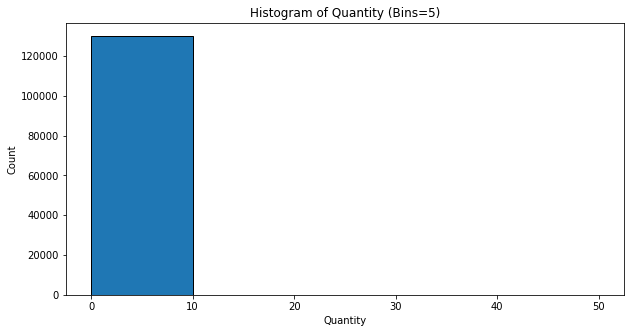

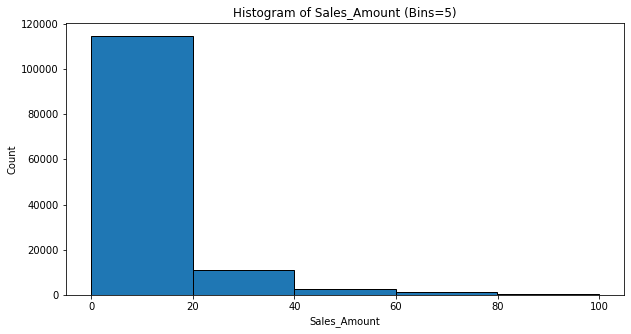

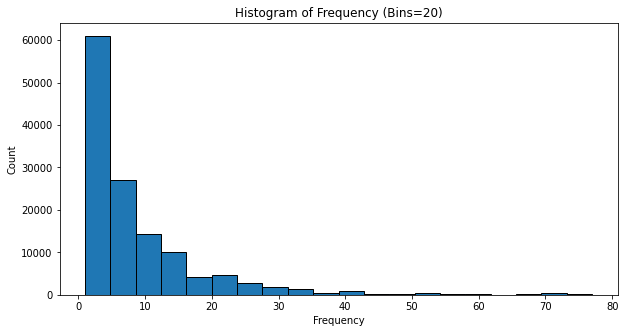

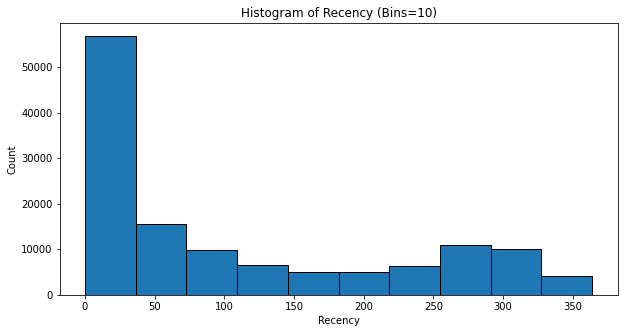

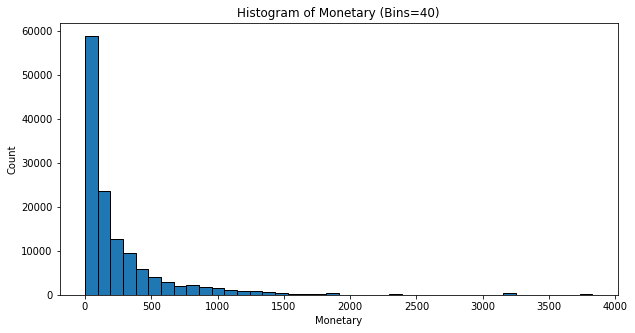

In [0]:
import matplotlib.pyplot as plt
import numpy as np

numeric_cols = ['Quantity', 'Sales_Amount', 'Frequency', "Recency", 'Monetary']
pandas_df = df.select(numeric_cols).toPandas()


bins_dict = {
    "Quantity": 5,
    "Sales_Amount": 5,
    "Frequency": 20,
    "Recency": 10,
    "Monetary": 40
}

for col in pandas_df:
    plt.figure(figsize=(10, 5))
    plt.hist(pandas_df[col], bins=bins_dict[col], edgecolor='black')
    plt.title(f"Histogram of {col} (Bins={bins_dict[col]})")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


#### Observation
- Histogram The RFM as well as Quantity and Sales_Amount tend to be right-skwed similarly. This shows that:
- Customers usually buy in quantities under 75 -> most of them are retail customers, this may be the main focus audience
- Sales_Amount shows that each order is mostly under $150, this number may be an indicator set to encourage consumers to spend up to that limit to receive promotions
- Recency shows that the time customers return to buy within less than 50 days is quite high -> Our **Active customers** However, there is also a relatively large number of **Inactive customers** with the most recent purchase time more than 300 days ago.
- Frequency is also a useful indicator to help classify customers as **One-time Buyers or Loyal Buyers**
- Customers spend the most on products under $500, ranging from $2000 to $4000

### C. Applying and Evaluate K-Means Clustering 
Explaination:

K-Means is an unsupervised clustering algorithm that divides data into 𝑘 clusters based on the distances between data points.

This algorithm assigns each data point to the cluster with the closest center, based on Euclidean distance (or other distance measures).


#### Normalize data with StandardScaler:

K-means requires the input features to be provided as a single vector.
VectorAssembler helps to combine the feature columns (Total_Spend, Frequency, Recency) into a vector to be input to the algorithm. Then putting in into StandardScaler step.


In [0]:
from pyspark.ml.feature import VectorAssembler, StandardScaler

# Create vector for features needed to Scale (removing IDs, category and date features because they do not have numerical values)
assembler = VectorAssembler(
    inputCols=numeric_cols,
    outputCol="features")
df = assembler.transform(df)


# Apply StandardScaler
scaler = StandardScaler(
    inputCol="features",
    outputCol="scaled_features",
    withStd=True,
    withMean=True
)#with Std and Mean help standard data not being skewed and more balanced between big and small values

#Check result
scaler_model = scaler.fit(df)
df = scaler_model.transform(df)


df.select("Customer_ID", "scaled_features").show(5, truncate=False)

+-----------+------------------------------------------+
|Customer_ID|scaled_features                           |
+-----------+------------------------------------------+
|2547       |[-0.2581403603227735,-0.6384802455806213] |
|822        |[-0.2581403603227735,-0.44006951375896636]|
|3686       |[-0.2581403603227735,-0.3642817234923256] |
|3719       |[-0.2581403603227735,-0.4289993870908054] |
|9200       |[-0.2581403603227735,-0.31914966861443844]|
+-----------+------------------------------------------+
only showing top 5 rows



#### Method 01: Apply K-means Clustering to the whole dataset

**Silhouette** is a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a higher Silhouette Coefficient score relates to a model with better defined clusters

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np


# Testing k from 2 to 10 Since the entire dataset has many features, more clusters need to be tested for analysis.
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Sử dụng ClusteringEvaluator để tính Silhouette Score
evaluator = ClusteringEvaluator(featuresCol="scaled_features", metricName="silhouette", distanceMeasure="squaredEuclidean")

# Vòng lặp thử các giá trị k
for k in k_values:
    kmeans = KMeans(featuresCol="scaled_features", k=k, seed=1)
    model = kmeans.fit(df)
    
    centroids = np.array(model.clusterCenters())

    # Dự đoán cụm
    clustered_df = model.transform(df)
    
    # Tính Silhouette Score
    silhouette = evaluator.evaluate(clustered_df)
    print(f"k = {k}, Silhouette Score = {silhouette}")

k = 2, Silhouette Score = 0.2979337297888323
k = 3, Silhouette Score = 0.4546685684975188
k = 4, Silhouette Score = 0.49453839045124653
k = 5, Silhouette Score = 0.559461403793304
k = 6, Silhouette Score = 0.5489416963990412
k = 7, Silhouette Score = 0.46734335653150333
k = 8, Silhouette Score = 0.5360757328007041
k = 9, Silhouette Score = 0.5404491552707867
k = 10, Silhouette Score = 0.4881371261899931


The highest Silhouette Score = 0.55 with k = 5, for further analyzed, I'm using the Elbow Method

**Elbow Method**

Using Elbow Method to evaluate K-means clustering then choosing the optimal k value.

As we increase k, the WCSS typically decreases because we’re creating more clusters, which tend to capture more data variations. However, there comes a point where adding more clusters results in only a marginal decrease in WCSS. This is where we observe an “elbow” shape in the graph.

We calculate a distance measure called WCSS (Within-Cluster Sum of Squares). This tells us how spread out the data points are within each cluster.



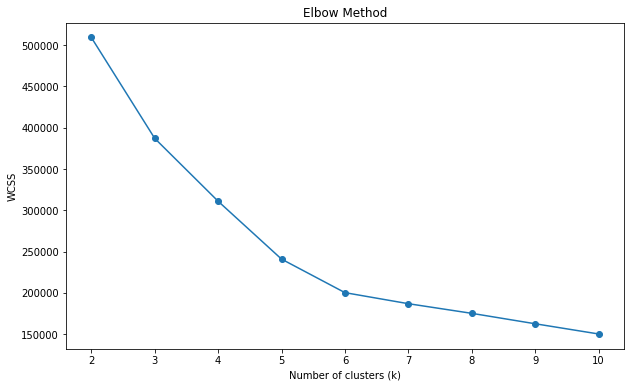

In [0]:
wcss = []

# Vòng lặp qua các giá trị k
for k in range(2, 11):
    kmeans = KMeans(featuresCol="scaled_features", k=k, seed=1)
    kmeans_model = kmeans.fit(df)
    wcss.append(kmeans_model.summary.trainingCost)

# Vẽ đồ thị Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


At Elbow Point: The number of clusters is sufficient to separate the data into tight and meaningful groups. The Elbow point is here with k = 5, as well as with its highest Silhoutte **index**

In [0]:

from sklearn.metrics import calinski_harabasz_score
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, FloatType
# Áp dụng KMeans với k = 6
kmeans = KMeans(featuresCol="scaled_features", k=5, seed=1)
model = kmeans.fit(df)

# Gán nhãn cụm cho dữ liệu
clustered_df = model.transform(df)

def vector_to_array(vector):
    return vector.toArray().tolist()

vector_to_array_udf = udf(vector_to_array, ArrayType(FloatType()))
clustered_df = clustered_df.withColumn("scaled_features_array", vector_to_array_udf(clustered_df["scaled_features"]))

# Chuyển đổi dữ liệu sang Pandas
pandas_df = clustered_df.select("scaled_features_array", "prediction").toPandas()

# Tính Calinski-Harabasz Index
ch_score = calinski_harabasz_score(pandas_df["scaled_features_array"].tolist(), pandas_df["prediction"])
print(f"Calinski-Harabasz Index (k=5): {ch_score:.2f}")




Calinski-Harabasz Index (k=5): 55708.64


In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, FloatType
def vector_to_array(vector):
    return vector.toArray().tolist()

#### Test 02: Apply K-means Clustering to only the RFM mectrics

In [0]:
from pyspark.ml.feature import VectorAssembler

# Chọn các biến RFM
rfm_assembler = VectorAssembler(
    inputCols=["Recency", "Frequency", "Monetary"],
    outputCol="rfm_features"
)
rfm_df = rfm_assembler.transform(df)


In [0]:

# Chọn các biến RFM
rfm_assembler = VectorAssembler(
    inputCols=["Recency", "Frequency", "Monetary"],
    outputCol="rfm_features"
)
rfm_df = rfm_assembler.transform(df)

# Kiểm tra nếu cột 'scaled_rfm_features' đã tồn tại
if "scaled_rfm_features" in rfm_df.columns:
    rfm_df = rfm_df.drop("scaled_rfm_features")

# Áp dụng StandardScaler
rfm_scaler = StandardScaler(
    inputCol="rfm_features",
    outputCol="scaled_rfm_features",
    withStd=True,
    withMean=True
)
rfm_model_scaler = rfm_scaler.fit(rfm_df)
rfm_df = rfm_model_scaler.transform(rfm_df)

# Hiển thị kết quả
rfm_df.select("Customer_ID", "rfm_features", "scaled_rfm_features").show(5, truncate=False)


+-----------+-------------------------------+--------------------------------------------------------------+
|Customer_ID|rfm_features                   |scaled_rfm_features                                           |
+-----------+-------------------------------+--------------------------------------------------------------+
|2547       |[259.0,7.0,121.36000000000001] |[1.3314056789970579,-0.14898849696901123,-0.35100573715147465]|
|822        |[332.0,3.0,20.4]               |[1.9776828024724824,-0.5390259658431052,-0.6209074798041817]  |
|3686       |[298.0,15.0,405.4400000000001] |[1.6766770189359834,0.631086440779177,0.4084404499798748]     |
|3719       |[301.0,10.0,420.71999999999997]|[1.7032363527774392,0.14353960468655932,0.4492892874178039]   |
|9200       |[266.0,2.0,18.01]              |[1.3933774579604548,-0.6365353330616288,-0.6272967940369469]  |
+-----------+-------------------------------+--------------------------------------------------------------+
only showing top 5 

In [0]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
import numpy as np


# Các giá trị k cần thử
k_values_rfm = [2, 3, 4, 5, 6]

# Sử dụng ClusteringEvaluator để tính Silhouette Score
evaluator_rfm = ClusteringEvaluator(featuresCol="scaled_rfm_features", metricName="silhouette", distanceMeasure="squaredEuclidean")

# Vòng lặp thử các giá trị k
for k in k_values_rfm:
    kmeans_rfm = KMeans(featuresCol="scaled_rfm_features", k=k, seed=1)
    model_rfm = kmeans_rfm.fit(rfm_df)
    
    centroids_rfm = np.array(model_rfm.clusterCenters())

    # Dự đoán cụm
    clustered_rfm_df = model_rfm.transform(rfm_df)
    
    # Tính Silhouette Score
    silhouette_rfm = evaluator_rfm.evaluate(clustered_rfm_df)
    print(f"k = {k}, Silhouette Score = {silhouette_rfm}")

k = 2, Silhouette Score = 0.4494242411913734
k = 3, Silhouette Score = 0.6834480795200039
k = 4, Silhouette Score = 0.6946088890677381
k = 5, Silhouette Score = 0.5606797009287721
k = 6, Silhouette Score = 0.5769043077302741


With k clustering from 2-6, k=4 has the highest Silhoutte index (0.69), indicating that the best way to classify customers into 5 groups is to classify them.

**The Silhouttee index is higher than applying K-means to the whole dataset.**

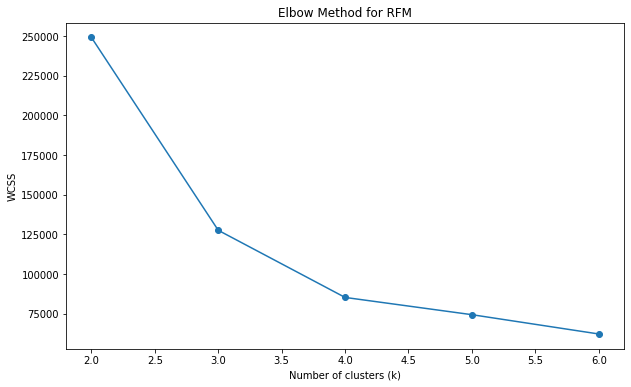

In [0]:
import matplotlib.pyplot as plt

wcss_rfm = []

# Vòng lặp qua các giá trị k
for k in range(2, 7):
    kmeans_rfm = KMeans(featuresCol="scaled_rfm_features", k=k, seed=1)
    model_rfm = kmeans_rfm.fit(rfm_df)
    wcss_rfm.append(model_rfm.summary.trainingCost)

# Vẽ đồ thị Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(2, 7), wcss_rfm, marker='o')
plt.title('Elbow Method for RFM')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

The Elbow point is here with k = 4, as well as with its highest Silhoutte **index**

In [0]:

from sklearn.metrics import calinski_harabasz_score

# Áp dụng KMeans với k = 4
kmeans_rfm = KMeans(featuresCol="scaled_rfm_features", k=4, seed=1)
model_rfm = kmeans_rfm.fit(rfm_df)

# Gán nhãn cụm cho dữ liệu
clustered_rfm_df = model_rfm.transform(rfm_df)

vector_to_array_udf = udf(vector_to_array, ArrayType(FloatType()))

# Áp dụng UDF
clustered_rfm_df = clustered_rfm_df.withColumn("scaled_rfm_array", vector_to_array_udf(clustered_rfm_df["scaled_rfm_features"]))

# Chuyển đổi sang Pandas
pandas_rfm_df = clustered_rfm_df.select("scaled_rfm_array", "prediction").toPandas()

# Tính Calinski-Harabasz Index
ch_score_rfm = calinski_harabasz_score(pandas_rfm_df["scaled_rfm_array"].tolist(), pandas_rfm_df["prediction"])
print(f"Calinski-Harabasz Index for RFM metrics (k=4): {ch_score_rfm:.2f}")

Calinski-Harabasz Index for RFM metrics (k=4): 155881.56


The value of k that yields the maximum CH index is chosen as the optimal number of clusters.


### D. Two methods Evaluation


In [0]:
from pyspark.sql import SparkSession

# Tạo SparkSession
spark = SparkSession.builder.appName("ComparisonTable").getOrCreate()

# Dữ liệu
data = [
    ("K-Means on the whole dataset", 0.559, 55708.64, 5),
    ("K-Means on RFM metrics", 0.690, 155881.56, 4)
]

# Tạo DataFrame
comparison_df = spark.createDataFrame(data, ["Method", "Silhouette Score", "CH Score", "Number of K Clusters"])

# Hiển thị
display(comparison_df)


Method Silhouette Score CH Score Number of K Clusters K-Means on the whole dataset 0.559 55708.64 5 K-Means on RFM metrics 0.69 155881.56 4

Applying K-means to the entire dataset gives not better results with lower Sillouette and CH-Score than Method 2 - applying K-means to RFM index.

It is possible that the remaining variables (Date, Transaction_ID, SKU_Category, SKU,..) cause noise in the model and do not really help distinguish customer groups clearly.

As for RFM variables (Recency, Frequency, Monetary), they are the main characteristic variables for customer segmentation analysis, helping the model easily identify different customer groups.

### E. Plot

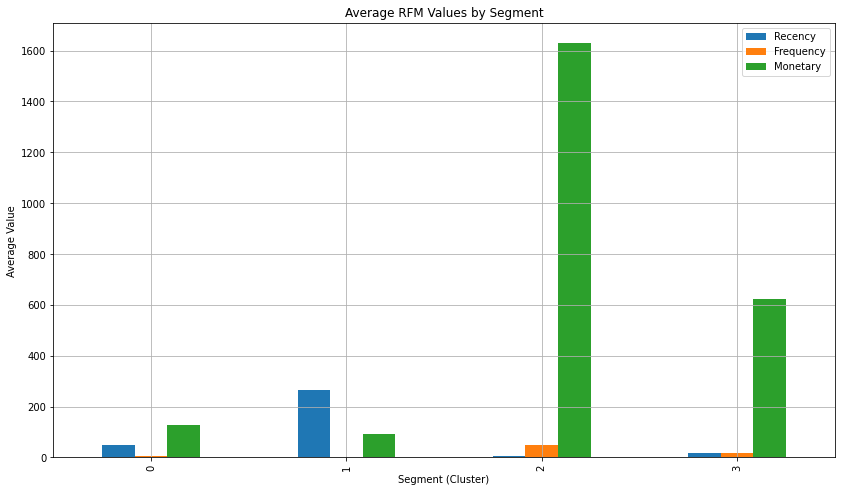

In [0]:

# Chuyển DataFrame PySpark sang Pandas để trực quan hóa
summary_pandas = summary_df.toPandas()
summary_pandas.sort_values(by="prediction", inplace=True)

# Vẽ bar chart
summary_pandas.plot(
    kind="bar",
    x="prediction",
    y=["Avg_Recency", "Avg_Frequency", "Avg_Monetary"],
    figsize=(14, 8),
    title="Average RFM Values by Segment"
)


plt.xlabel("Segment (Cluster)")
plt.ylabel("Average Value")
plt.legend(["Recency", "Frequency", "Monetary"])
plt.grid(True)
plt.show()


In [0]:
# Tính trung bình của các biến RFM theo từng cụm
summary_df = clustered_rfm_df.groupBy("prediction").agg(
    {"Recency": "avg", "Frequency": "avg", "Monetary": "avg"}
)

# Đổi tên cột cho dễ đọc
summary_df = summary_df.withColumnRenamed("avg(Recency)", "Avg_Recency") \
                       .withColumnRenamed("avg(Frequency)", "Avg_Frequency") \
                       .withColumnRenamed("avg(Monetary)", "Avg_Monetary")

# Hiển thị bảng kết quả
summary_df.show()


+----------+------------------+------------------+------------------+
|prediction|       Avg_Recency|      Avg_Monetary|     Avg_Frequency|
+----------+------------------+------------------+------------------+
|         1|265.24523815483195|  93.8565852376535| 3.245513478337046|
|         3|18.507940552016986| 622.5951108280218|18.846114649681528|
|         2| 6.427072927072927| 1628.524483016966| 48.84415584415584|
|         0| 49.32266942411709|127.35725246579847|  5.45173401209036|
+----------+------------------+------------------+------------------+



### Customer Segment Analysis:

##### Cluster 0: Potential Loyalists 
- Avg_Recency = 49.32: These customers have made a recent purchase (within the last 50 days).
- Avg_Monetary = 127.36: Their total spending is average.
- Avg_Frequency = 5.45: They have made a few purchases, indicating some interest in the brand.

This group includes customers who are new or in the discovery phase of the brand. They have the potential to become loyal customers, but are currently in the trial shopping phase.
 

##### Cluster 1: Lost Customers
- Avg_Recency = 265.25: These customers have not made a purchase in a long time (average of more than 8 months).
- Avg_Monetary = 93.86: Their total spending is low.

- Avg_Frequency = 3.25: They buy very few times.

This is a group of customers who are infrequent or at risk of leaving the brand. They may be customers who have purchased in the past but are no longer coming back to shop.


##### Cluster 2: Loyal customers
- Recency: Low (they have recently purchased).

- Frequency: Medium.

- Monetary: Medium.

This is a group of customers who are loyal and most valuable to the business. They come back to shop frequently and spend a lot.


#####Cluster 3: Champions

- Avg_Recency = 18.51: They have recently purchased.

- Avg_Monetary = 622.60: Their total spending is high.

- Avg_Frequency = 18.84: They shop quite frequently.

This is a group of customers who spend quite a lot and come back to shop frequently. However, they have not reached the highest level of loyalty.

References:
- https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
- https://en.wikipedia.org/wiki/Silhouette_(clustering)
- https://en.wikipedia.org/wiki/Calinski%E2%80%93Harabasz_index#Finding_the_optimal_number_of_clusters